# Ejercicio con regularizadores

In [12]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)
from keras.datasets import mnist
from tensorflow.keras.layers import Dense
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: []
2.9.2


In [13]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [14]:
# Prepara con reshape y normaliza las imágenes tanto de entrenamiento como de test
from keras.utils.np_utils import to_categorical

print (train_images.shape)
print (train_labels.shape)

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

print (train_images.shape)
print (train_labels.shape)

(60000, 28, 28)
(60000,)
(60000, 784)
(60000,)


In [15]:
# Crear un subconjunto de imágenes de entrenamiento que llamaré
# validation_images, para hacer las validaciones, con las 10000 últimas imágenes 
# del set de datos de entrenamiento (train_images) (obviamente, lo mismo con las
# etiquetas correspondientes -> validation_labels). Deja preparadas las 50K 
# primeras imágenes y etiquetas para entrenamiento (train_images y train_labels)

validation_images = train_images[50000:60000]
validation_labels = train_labels[50000:60000]


In [16]:
def crea_modelo(regularizador):
  # Define una función que recibe un número del 0 al 4 que creará:
  # un modelo secuencial con una capa de entrada densa de 512 neuronas
  # con activación relu y la capa de salida que le corresponda según el problema
  # Ahora, en función del número del regularizador:
  # Si es 0, no mete ningún regularizador
  # Si es 1, mete un regularizador de tipo l1 y valor 0.001
  # Si es 2, mete un regularizador de tipo l2 y valor 0.001
  # Si es 3, mete un regularizador de tipo l1_l2 y valor 0.001 para ambos
  # Si es 4, mete un Dropout del 50% después de la primera capa densa
  # Si es distinto que estos valores, escribe el error y retorna
  # Al final, esta función pinta el summary del modelo y retorna el modelo creado
    model=models.Sequential()
    if regularizador<0 or regularizador>4:
      print('ERROR')
    elif regularizador == 0:
      model. add (layers. Dense(512, activation='relu'))
      model. add (layers. Dense(10, activation='softmax'))
    elif regularizador == 1:
      # Regularización L1
      model.add(layers.Dense(512,kernel_regularizer= regularizers.l1(0.001),activation='relu'))
      model. add (layers. Dense(10, activation='softmax'))
    elif regularizador == 2:
      # Regularización L2
      model.add(layers.Dense(512,kernel_regularizer= regularizers.l2(0.001),activation='relu'))
      model. add (layers. Dense(10, activation='softmax'))
    elif regularizador == 3:
      # Regularización simultánea L1 y L2
      model.add(layers.Dense(16,kernel_regularizer= regularizers.l1_l2(0.001),activation='relu'))
      model. add (layers. Dense(10, activation='softmax'))
    elif regularizador == 4:
      model. add (layers. Dense(512, activation='relu'))
      model.add(layers.Dropout(0.5))
      model. add (layers. Dense(10, activation='softmax'))
    return model

In [17]:
def compila_modelo(modelo): 
  # Define una función que recibe un modelo, lo compila con un optimizador
  # 'rmsprop', con una función de pérdida 'sparse_categorical_crossentropy' y
  # una métrica de precisión. La función retorna el modelo
  modelo.compile(optimizer= 'rmsprop', loss='sparse_categorical_crossentropy', metrics='accuracy')

  return modelo

In [18]:
def entrena_modelo(modelo):
  # Define una función que entrena el modelo que se le pasa por parámetro,
  # con las imágenes y etiquetas de entrenamiento, con 30 iteraciones y 128
  # de tamaño de minilote y con el validation_data creado más arriba.
  # Esta función devuelve un history
  history = modelo.fit(train_images, train_labels, epochs=30, batch_size=128, validation_data=(validation_images,validation_labels))

  return history

In [56]:
def pinta_perdida_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  epochs = range(1, len(acc) + 1)
  # "bo" es para "punto azun"
  plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
  # "b" es para "linea continua azul"
  plt.plot(epochs, val_loss, 'r', label='Pérdida de Validación')
  plt.title('Pérdida de Entrenamiento y Validación')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [68]:
def pinta_precision_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  plt.clf()   # Limpia la figura
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'b^', label='Precisión de Entrenamiento')
  plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
  plt.title('Precisión de Entrenamiento y Valización')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

## Una vez definidas todas las funciones anteriores, ejecuta las siguientes llamadas a dichas funciones y deduce que está pasando y, para este contexto, que es lo que mejor está funcionando

### Caso 0, sin regularizadores

In [21]:
network0 = crea_modelo(0)

In [22]:
network0 = compila_modelo(network0)

In [23]:
historia0 = entrena_modelo(network0)

Epoch 1/30
469/469 [==============================] - 8s 15ms/step - loss: 0.2597 - accuracy: 0.9257 - val_loss: 0.1068 - val_accuracy: 0.9714
Epoch 2/30
469/469 [==============================] - 6s 12ms/step - loss: 0.1040 - accuracy: 0.9696 - val_loss: 0.0609 - val_accuracy: 0.9819
Epoch 3/30
469/469 [==============================] - 5s 11ms/step - loss: 0.0690 - accuracy: 0.9795 - val_loss: 0.0470 - val_accuracy: 0.9854
Epoch 4/30
469/469 [==============================] - 5s 11ms/step - loss: 0.0489 - accuracy: 0.9857 - val_loss: 0.0320 - val_accuracy: 0.9908
Epoch 5/30
469/469 [==============================] - 6s 12ms/step - loss: 0.0376 - accuracy: 0.9890 - val_loss: 0.0214 - val_accuracy: 0.9936
Epoch 6/30
469/469 [==============================] - 6s 12ms/step - loss: 0.0285 - accuracy: 0.9915 - val_loss: 0.0188 - val_accuracy: 0.9953
Epoch 7/30
469/469 [==============================] - 6s 13ms/step - loss: 0.0220 - accuracy: 0.9933 - val_loss: 0.0170 - val_accuracy: 0.9948

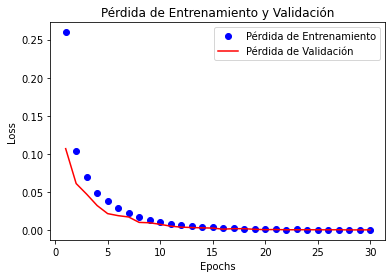

In [58]:
pinta_perdida_entrenamiento_validacion(historia0)

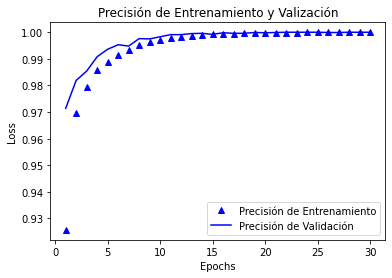

In [69]:
pinta_precision_entrenamiento_validacion(historia0)

### Caso 1: Con regularizador l1

In [26]:
network1 = crea_modelo(1)

In [27]:
network1 = compila_modelo(network1)

In [28]:
historia1 = entrena_modelo(network1)

Epoch 1/30
469/469 [==============================] - 7s 13ms/step - loss: 1.9494 - accuracy: 0.8489 - val_loss: 1.0111 - val_accuracy: 0.8757
Epoch 2/30
469/469 [==============================] - 6s 13ms/step - loss: 0.9084 - accuracy: 0.8885 - val_loss: 0.7878 - val_accuracy: 0.9150
Epoch 3/30
469/469 [==============================] - 6s 13ms/step - loss: 0.7881 - accuracy: 0.9099 - val_loss: 0.7031 - val_accuracy: 0.9296
Epoch 4/30
469/469 [==============================] - 6s 12ms/step - loss: 0.7188 - accuracy: 0.9218 - val_loss: 0.6612 - val_accuracy: 0.9378
Epoch 5/30
469/469 [==============================] - 6s 13ms/step - loss: 0.6721 - accuracy: 0.9302 - val_loss: 0.6132 - val_accuracy: 0.9450
Epoch 6/30
469/469 [==============================] - 7s 14ms/step - loss: 0.6364 - accuracy: 0.9360 - val_loss: 0.6117 - val_accuracy: 0.9422
Epoch 7/30
469/469 [==============================] - 7s 16ms/step - loss: 0.6097 - accuracy: 0.9414 - val_loss: 0.5676 - val_accuracy: 0.9549

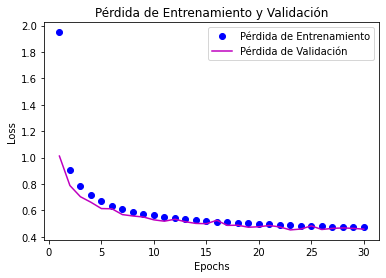

In [29]:
pinta_perdida_entrenamiento_validacion(historia1)

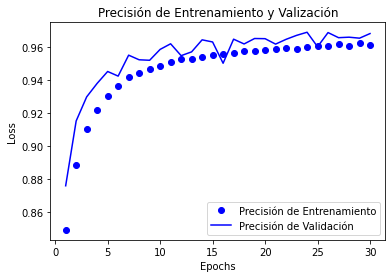

In [30]:
pinta_precision_entrenamiento_validacion(historia1)

### Caso 2: Con regularizador l2

In [31]:
network2 = crea_modelo(2)

In [32]:
network2 = compila_modelo(network2)

In [33]:
historia2 = entrena_modelo(network2)

Epoch 1/30
469/469 [==============================] - 6s 13ms/step - loss: 0.4878 - accuracy: 0.9200 - val_loss: 0.2653 - val_accuracy: 0.9598
Epoch 2/30
469/469 [==============================] - 6s 13ms/step - loss: 0.2412 - accuracy: 0.9579 - val_loss: 0.2059 - val_accuracy: 0.9630
Epoch 3/30
469/469 [==============================] - 6s 13ms/step - loss: 0.1961 - accuracy: 0.9653 - val_loss: 0.1830 - val_accuracy: 0.9671
Epoch 4/30
469/469 [==============================] - 6s 12ms/step - loss: 0.1767 - accuracy: 0.9679 - val_loss: 0.1410 - val_accuracy: 0.9798
Epoch 5/30
469/469 [==============================] - 6s 13ms/step - loss: 0.1659 - accuracy: 0.9703 - val_loss: 0.1471 - val_accuracy: 0.9779
Epoch 6/30
469/469 [==============================] - 6s 13ms/step - loss: 0.1566 - accuracy: 0.9730 - val_loss: 0.1728 - val_accuracy: 0.9639
Epoch 7/30
469/469 [==============================] - 6s 13ms/step - loss: 0.1511 - accuracy: 0.9736 - val_loss: 0.1313 - val_accuracy: 0.9801

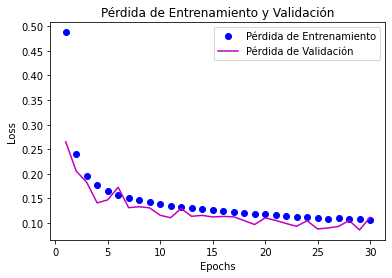

In [34]:
pinta_perdida_entrenamiento_validacion(historia2)

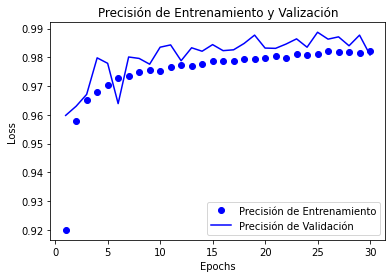

In [35]:
pinta_precision_entrenamiento_validacion(historia2)

### Caso 3: Con regularizador l1_l2

In [36]:
network3 = crea_modelo(3)

In [37]:
network3 = compila_modelo(network3)

In [38]:
historia3 = entrena_modelo(network3)

Epoch 1/30
469/469 [==============================] - 2s 4ms/step - loss: 1.0663 - accuracy: 0.8139 - val_loss: 0.7063 - val_accuracy: 0.8977
Epoch 2/30
469/469 [==============================] - 2s 3ms/step - loss: 0.6841 - accuracy: 0.8911 - val_loss: 0.6079 - val_accuracy: 0.9072
Epoch 3/30
469/469 [==============================] - 1s 3ms/step - loss: 0.6141 - accuracy: 0.8972 - val_loss: 0.5752 - val_accuracy: 0.9033
Epoch 4/30
469/469 [==============================] - 1s 3ms/step - loss: 0.5734 - accuracy: 0.9010 - val_loss: 0.5294 - val_accuracy: 0.9130
Epoch 5/30
469/469 [==============================] - 2s 3ms/step - loss: 0.5463 - accuracy: 0.9024 - val_loss: 0.4959 - val_accuracy: 0.9169
Epoch 6/30
469/469 [==============================] - 2s 3ms/step - loss: 0.5246 - accuracy: 0.9060 - val_loss: 0.4861 - val_accuracy: 0.9167
Epoch 7/30
469/469 [==============================] - 1s 3ms/step - loss: 0.5079 - accuracy: 0.9067 - val_loss: 0.4703 - val_accuracy: 0.9192
Epoch 

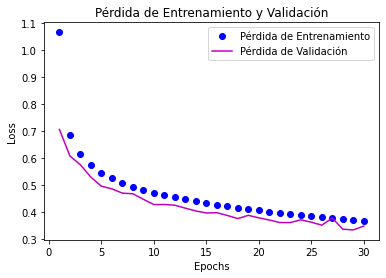

In [39]:
pinta_perdida_entrenamiento_validacion(historia3)

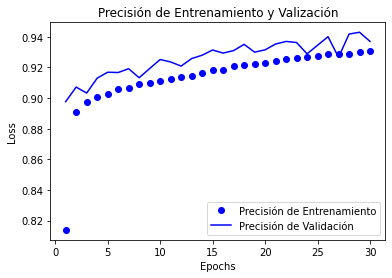

In [40]:
pinta_precision_entrenamiento_validacion(historia3)

### Caso 4: Con Droput

In [41]:
network4 = crea_modelo(4)

In [42]:
network4 = compila_modelo(network4)

In [43]:
historia4 = entrena_modelo(network4)

Epoch 1/30
469/469 [==============================] - 6s 12ms/step - loss: 0.3150 - accuracy: 0.9066 - val_loss: 0.1325 - val_accuracy: 0.9634
Epoch 2/30
469/469 [==============================] - 6s 12ms/step - loss: 0.1557 - accuracy: 0.9541 - val_loss: 0.0990 - val_accuracy: 0.9719
Epoch 3/30
469/469 [==============================] - 6s 12ms/step - loss: 0.1186 - accuracy: 0.9645 - val_loss: 0.0694 - val_accuracy: 0.9797
Epoch 4/30
469/469 [==============================] - 6s 12ms/step - loss: 0.1002 - accuracy: 0.9695 - val_loss: 0.0521 - val_accuracy: 0.9842
Epoch 5/30
469/469 [==============================] - 6s 12ms/step - loss: 0.0872 - accuracy: 0.9743 - val_loss: 0.0456 - val_accuracy: 0.9871
Epoch 6/30
469/469 [==============================] - 6s 12ms/step - loss: 0.0781 - accuracy: 0.9769 - val_loss: 0.0403 - val_accuracy: 0.9878
Epoch 7/30
469/469 [==============================] - 6s 12ms/step - loss: 0.0712 - accuracy: 0.9786 - val_loss: 0.0324 - val_accuracy: 0.9910

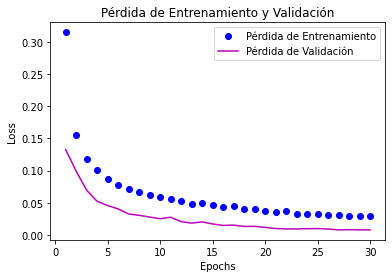

In [44]:
pinta_perdida_entrenamiento_validacion(historia4)

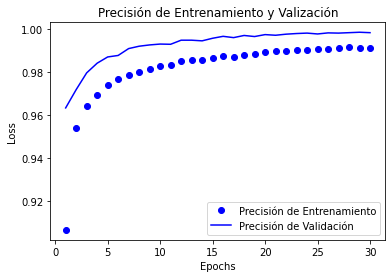

In [45]:
pinta_precision_entrenamiento_validacion(historia4)

### Caso 5: Error de código de regularizador

In [46]:
network5 = crea_modelo(5)

ERROR


### CONCLUSIONES

¿Qué regularizador funciona mejor para este caso?
En esta práctica hemos utilizado 5 modelos:

El modelo 0, en el cual no hemos metido ningún regularizador.
En el modelo 1, en el cual hemos metido un regularizador de tipo L1 y valor 0.001.
En el modelo 2, hemos metido un regularizador de tipo L2 y valor 0.001.
En el modelo 3, hemos metido un regularizador de tipo L1 y L2 y valor 0.001.
En el modelo 4, hemos metido un Dropout del 50% después de la primera capa.

Un dropout es una técnica de regularización para reducir el sobreajuste en los modelos de redes neuronales artificiales.

Para comparar los modelos vamos a utilizar las precisiones más altas, tanto de precisión(accuracy) como de precisión de validación(val_accuracy).

- En el modelo 0 podemos ver que la precisión más alta es del 100% y la precisión de validación es 100%, por lo tanto podemos concluir que este regularizador tiene igual precisión con los datos nuevos que con los datos que no ha visto nunca.

- En el modelo 1 nos proporciona una precisión del 95,06% y una precisión de validación del 96,18%, en la compilación utilizada para la comparación. Los datos de validación funcionaran con una mayor precisión. Este regularizador tiene mejor precisión con los datos que no ha visto nunca que con los primeros datos.

- En el modelo 2 nos proporciona una precisión 97,88% y una precisión de validación del 98,77%. Este regularizador tiene mejor precisión con los datos que no ha visto nunca que con los primeros datos.

- En el modelo 3 nos proporciona una precisión 92,99% y una precisión de validación del 94,30%. Este regularizador tiene mejor precisión con los datos que no ha visto nunca que con los primeros datos.

- En el modelo 4 nos proporciona una precisión 99,17% y una precisión de validación del 99,86%. Este regularizador tiene mejor precisión con los datos que no ha visto nunca que con los primeros datos.

- El modelo 5 es error de regularizador.

En conclusión, el mejor modelo es el 0 puesto que con los datos de validación llegamos al 100%. Al meterle los regularizadores no he obtenido ninguna precisión mayor. Por tanto considero que el modelo sin regularizadores es la solución óptima.

Si consideramos únicamente los modelos en los que hemos metido regularizadores, la mejor solución sería meterle  L2 (modelo 3), puesto que la precisión es mayor que cuando metemos L1 o ambos.

